### ARTIFICIAL INTELLIGENCE FUNDAMENTALS PROJECT 2024/2025 - Charisardo Team 

[Github repository](https://github.com/sypeeoui/Charisardo) 

#### 1. Introduction

Our project focused on the design and implementation of several agent algorithms capable of engaging in Pokémon battles with randomly selected teams, determining the best move from those available. 
The task was part of the battle track of the VGC AI Competition 2024.
We simulated the battles using the VGC AI Framework, which we modified to introduce non-determinism and to add additional features to the Pokémon. <br>
We developed four strategies using three approaches:
* Heuristic-based method
* Minimax search with alpha-beta pruning
* Greedy search (two versions)

#### 2. Related works

To build the Pokémon teams and simulate the battles we used [VGC AI framework](https://gitlab.com/DracoStriker/pokemon-vgc-engine), an environment designed to emulate the scenario of human video game championships of Pokémon with AI agents, including the game balance aspect. 
We used the policies already implemented in the framework as a benchmark to evaluate our algorithms. More information about the VCG AI framework are avaiable in the related [paper](https://ieeexplore.ieee.org/document/9618985). <br>
We also compared our strategies to the two best competitors in the 2024 competition, *[Punisher](https://gitlab.com/DracoStriker/pokemon-vgc-engine/-/tree/master/competition/vgc2024/Punisher%20-%20Knulon?ref_type=heads)*, implemented by Daniel Ladwig and Marlon Hörner, and *[hayo5_BattlePolicy](https://gitlab.com/DracoStriker/pokemon-vgc-engine/-/tree/master/competition/vgc2024/HayoBot%20-%20%EC%A1%B0%ED%95%98%EC%98%81?ref_type=heads)*, created by Jo Ha Young. <br>
To design and implement some of our algorithms we referred to the textbook *Artificial Intelligence: a Modern Approach*, by Russell and Norvig, in particular chapters 3.5, 5.2 and 5.3.

#### 3. Environment and task

Pokémon battles are conducted between two players, each controlling a team of three Pokémon, of which one is active and the others are party. Each Pokémon can perform four specific moves, characterized by type, maximum power, accuracy, and maximum PP.

At each turn, players select one of the four moves of their active Pokémon or switch it with one of the party. Switching, the player loses the opportunity to perform a move during that turn. Players are aware of the possible moves available to the opponent’s Pokémon but do not know which move the opponent will choose in the current turn, as decisions are made simultaneously. When a Pokémon's HP reaches zero, it faints, forcing the player to switch to another Pokémon. The match continues until all Pokémon on one team have fainted, at which point the opposing player is declared the winner. <br>

Our goal is to develop a gameplay strategy that allows us to compete with a randomly generated team against any opponent, spending a reasonable amount of time.

#### 3.1 Team generation

To generate teams, we implemented the function *OwnTeamGenerator()*, which randomly selects the characteristics of the moves for the Pokémon in the team. This function also enabled us to vary the accuracy, i.e., the success rate of moves, which in the original framework was always set to 1. By introducing this non-deterministic element, we increased the complexity of the game.

**fate altre sezioni con le modifiche a environment** 

#### 4. Methodologies

**spiegate algoritmi**


##### 4.1 Heuristical

##### 4.2 PrunedTreeSearch

##### 4.3 WeightedGreedy 1/2

#### 5. Assessment
We evaluated the performance of our algorithms comparing them to each other, to the two best policies of 2024 competition (*'Punisher'*, the winner, and *'hayo5_BattlePolicy'*, second place) and to six already implemented policies: *'RandomPlayer'*, *'TypeSelector'*, *'BreadthFirstSearch'*, *'OneTurnLookahead'*, *'PrunedBFS'* and *'TunedTreeTraversal'*. <br> **specificare cosa fanno?**

We simulated 600 battles for each combination of policies changing each time the composition of the two teams. We used win rate, number of turns and required time as evaluation metrics. 
 
##### 5.1 Win rate 

For each combination of policies, we calculated the rate of won matches over the total. Results are shown in **Figure 1**, where our algorithms are highlighted with two asterisks and the competition winners are indicated by one asterisk. The strategies are ordered by the total win rate, which is reported in the last column.<br> 

We can see that our strategies have a good performance against the random player, in particular the greedy approaches have a win rate higher than 0.85, and they are the 3 best policies between the 12 proposed. *PrunedTreeSearch* has a similar win rate, while *Heuristical* perform slightly worse, but it still have a good result, much higher than 0.50. <br>

With respect to the total win rate, we can see that our weighted greedy approaches have again the highest results, followed by *OneTurnLookAhead* and *Punisher*, two others greedy strategies. The success of the greedy approaches is probably due to the randomness of the game: it's unlikely that randomly selected Pokémons can combine their moves to obtain a particularly effective strategy, so maximizing the utility of next move is often the best choice, and the key is to define a good heuristic function to represent utility. <br>
Between the tree search approaches our agent perform the best together with *BreadthFirstSearch*.

<br>
Anyway, considering the total win rate, no policy have clearly better results (all results are below 0.60), but our best agents are quite good against the weakest benchmark agents (*RandomPlayer*, *TunedTreeTraversal* and *PrunedBFS*).

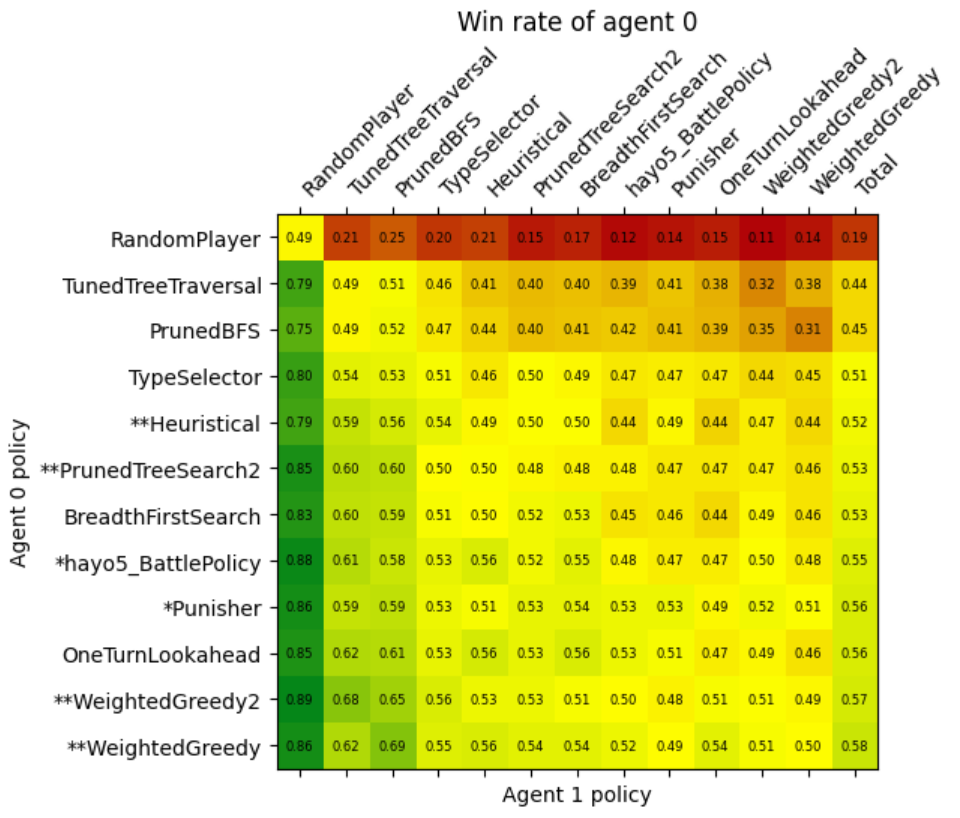 <br>
###### **Figure 1**: Win rate for all combination of policies and total value for each policy

##### 5.2 Number of turns
To evaluate the efficacy of each strategy we also observed the mean number of turns required to end a battle, shown in **Figure 2**. We can see that for most strategies the value is between 6 and 7, with very small differences for policies from *BredthFirstSearch* to *WeightedGreedy*. *Heuristical* has the highest value excluding *RandomPlayer*, but it's still under 7. <br>

![Screenshot 2024-12-30 100751.png](<attachment:Screenshot 2024-12-30 100751.png>) <br>
###### **Figure 2**: Mean number of turn required to end a battle for each policy

**vorrei metterci std ma forse inutile**

##### 5.3 Time
Finally, since the performances of the policies were similar in terms of win rate and number of turns, we evaluated the average time of each strategy to choose the move. The results are presented in **Figure 3**. As clearly evident in **Figure 3a)**, our policy *PrunedTreeSearch2* is much slower than the others, making it a worse choice, expecially considering its non outstanding results in terms of win rate and number of turns. <br>
In **Figure 3b)** there is a focus on the range [0 - 0.7] s, and we can see that our best agents are still much slower than comparably approaches which perform slightly worse: *hayo5_BattlePolicy* has a mean time of 4.1e-05 s, *Punisher* of 1.1e-05 and *OneTurnLookahead* of 1.6e-05, while *WeightedGreedy* and *WeightedGreedy2* are 3.0e-02 and 6.1e-02 respectevely. Heuristical is faster, with a time of 3.9e-03 s, but still slower than other strategies.<br>
Regarding our policies, we can observe that *WeightedGreedy2*, which is a modification of *WeightedGreedy*, requires a double time, without an improvement in battle outcome.

<br>
Probably the biggest weakness of our policies is the computational time, expecially compared to *OneTurnLookAhead*, *Punisher* and *hayo5_BattlePolicy*. This difference may be due to the complexity added to the game setting a random accuracy, which forced our agents to more considerations. 

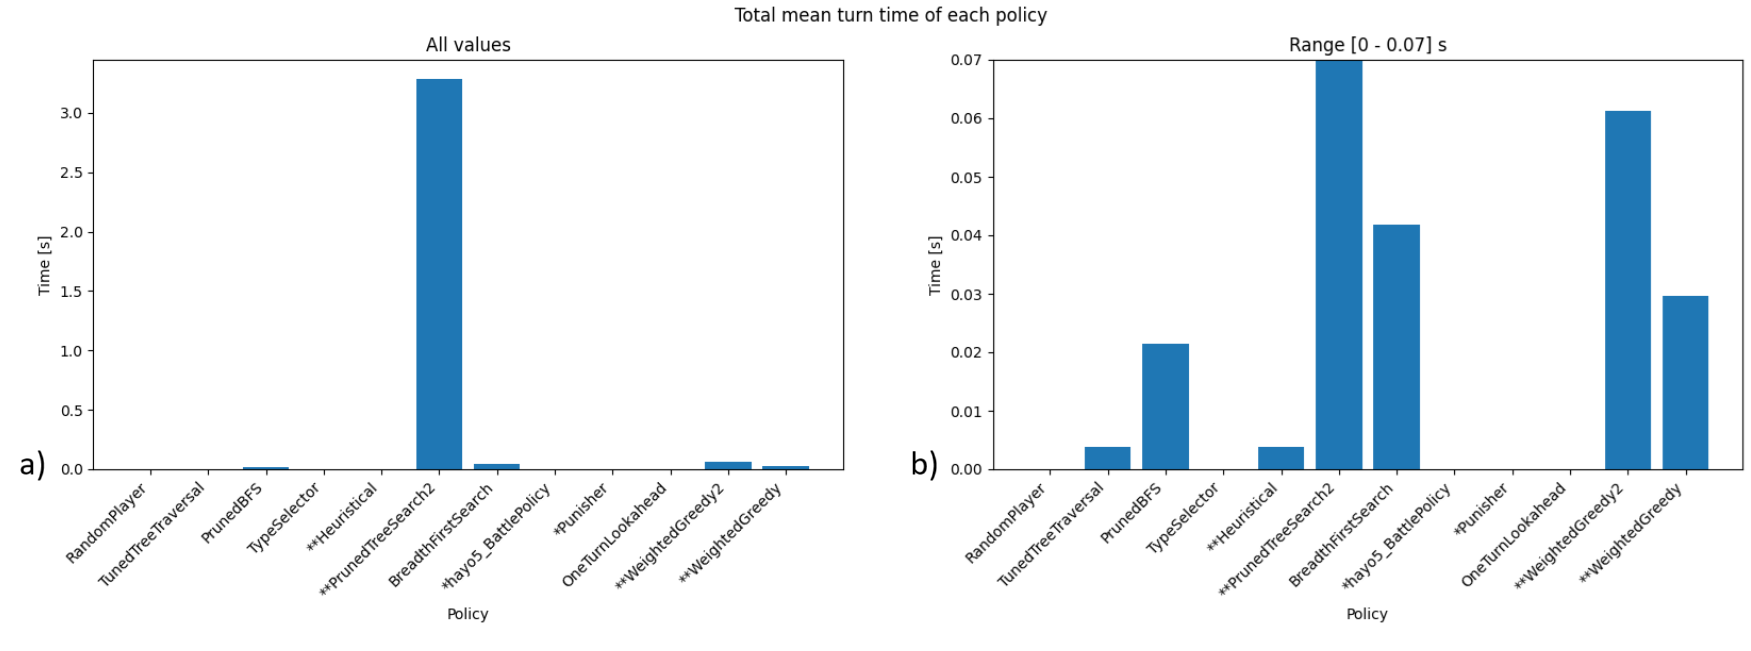
###### **Figure 3**: Mean time to perform a turn for each policy. **a)** All values range, **b)** Range [0 - 0.07] s 
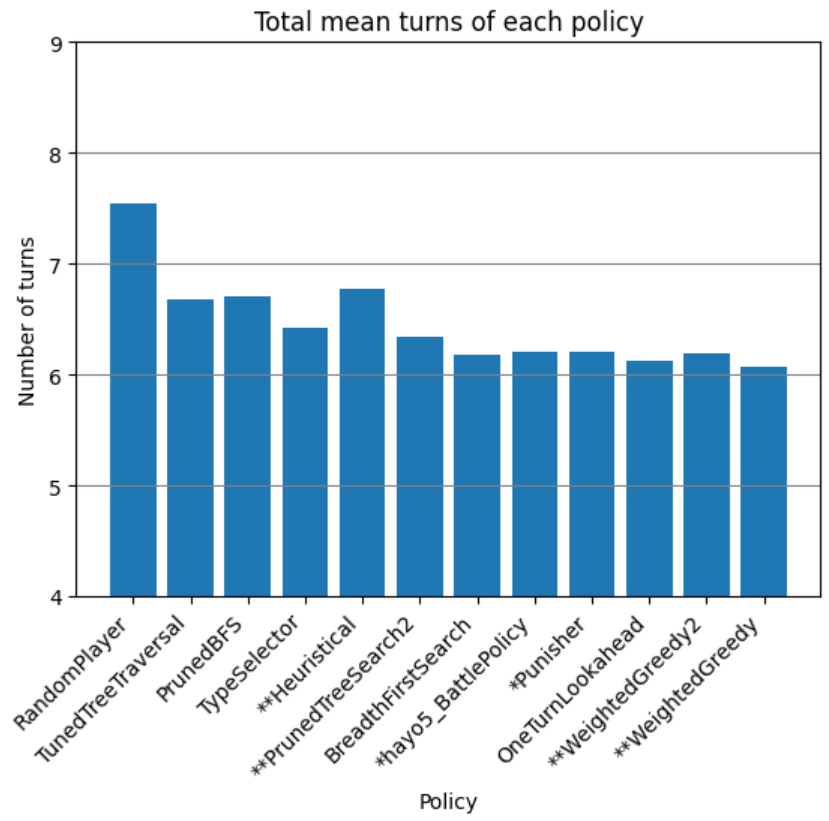

#### 6. Conclusions

**Gli approcci greedy sono er meglio probabilmente perché essendo un ambiente complesso e randomico se massimizzi nel breve tempo fai bene + sono veloci**

#### 7 Appendix:
##### 7.1 Team contribution:
- Vito
- Suqi
- Salvatore
- Antonio
- Matilde carried out initial analyses and final assesment <br>

Everyone contibuted on idea development, bug fixing and report writing

##### 7.2 Relationship with the course 
